In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from mlxtend.evaluate import bias_variance_decomp

In [2]:
df_train = pd.read_csv('./../data/train.csv')
df_train.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Male,23.170309,1.707557,75.306702,yes,2.303367,1.277636,Sometimes,no,3.042774,Sometimes,yes,no,0.944982,0.366126,Public_Transportation,Body Level 3
1,Female,39.965474,1.739293,80.914382,yes,2.416044,1.352649,Sometimes,no,3.196043,Sometimes,no,no,0.148628,1.082660,Automobile,Body Level 3
2,Female,19.000000,1.650000,56.000000,yes,3.000000,3.000000,Frequently,yes,3.000000,Frequently,yes,yes,1.000000,2.000000,Public_Transportation,Body Level 2
3,Female,18.297229,1.637396,70.000000,yes,2.000000,2.326165,no,no,1.999014,Sometimes,yes,no,0.007050,0.000000,Public_Transportation,Body Level 3
4,Male,18.701766,1.704908,81.384224,yes,2.650629,1.708083,Sometimes,no,1.000000,Sometimes,yes,no,1.876051,0.938791,Public_Transportation,Body Level 3


In [3]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('Body_Level')
df_train[categorical_columns].head()

,Gender,H_Cal_Consump,Alcohol_Consump,Smoking,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Transport
0,Male,yes,Sometimes,no,Sometimes,yes,no,Public_Transportation
1,Female,yes,Sometimes,no,Sometimes,no,no,Automobile
2,Female,yes,Frequently,yes,Frequently,yes,yes,Public_Transportation
3,Female,yes,no,no,Sometimes,yes,no,Public_Transportation
4,Male,yes,Sometimes,no,Sometimes,yes,no,Public_Transportation


#### Using one hot encoding for categorical features

In [4]:
encoder = OneHotEncoder()
encoder.fit(df_train[categorical_columns])
encoded_columns = encoder.transform(df_train[categorical_columns])
encoded_columns

# drop categorical columns from the dataframe and add encoded columns
df_train = df_train.drop(categorical_columns, axis=1)

In [5]:
encoded_columns.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [6]:
df_train = pd.concat([df_train, pd.DataFrame(encoded_columns.toarray(), columns=encoder. get_feature_names_out(categorical_columns))], axis=1)
df_train.head()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev,Body_Level,Gender_Female,...,Food_Between_Meals_no,Fam_Hist_no,Fam_Hist_yes,H_Cal_Burn_no,H_Cal_Burn_yes,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,23.170309,1.707557,75.306702,2.303367,1.277636,3.042774,0.944982,0.366126,Body Level 3,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,39.965474,1.739293,80.914382,2.416044,1.352649,3.196043,0.148628,1.082660,Body Level 3,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,19.000000,1.650000,56.000000,3.000000,3.000000,3.000000,1.000000,2.000000,Body Level 2,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,18.297229,1.637396,70.000000,2.000000,2.326165,1.999014,0.007050,0.000000,Body Level 3,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,18.701766,1.704908,81.384224,2.650629,1.708083,1.000000,1.876051,0.938791,Body Level 3,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Applying the preprocessing steps to the validation data

In [7]:
df_validation = pd.read_csv('./../data/val.csv')
# use the same encoder to encode the validation data
encoded_columns = encoder.transform(df_validation[categorical_columns])
df_validation = df_validation.drop(categorical_columns, axis=1)
df_validation = pd.concat([df_validation, pd.DataFrame(encoded_columns.toarray(), columns=encoder. get_feature_names_out(categorical_columns))], axis=1)
df_validation.head()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev,Body_Level,Gender_Female,...,Food_Between_Meals_no,Fam_Hist_no,Fam_Hist_yes,H_Cal_Burn_no,H_Cal_Burn_yes,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,18.000000,1.580000,48.000000,2.000000,2.000000,3.0,1.000000,0.000000,Body Level 2,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,23.000000,1.835643,58.854416,3.000000,2.027984,3.0,1.661556,0.114716,Body Level 1,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,26.208134,1.700000,78.041338,2.784383,2.165605,3.0,0.855973,0.839659,Body Level 3,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,23.000000,1.800000,90.000000,1.000000,2.000000,3.0,0.000000,2.000000,Body Level 3,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,23.000000,1.660000,60.000000,2.000000,2.000000,3.0,3.000000,0.000000,Body Level 2,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
y_train = df_train['Body_Level']
x_train = df_train.drop(['Body_Level'], axis=1)
y_val = df_validation['Body_Level']
x_val = df_validation.drop(['Body_Level'], axis=1)

In [20]:
%run "./all_numerical_data.ipynb"

In [21]:
param_grid = {
    "alpha": [0.001, 0.01, 0.1, 0.5,1, 10],
    "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
}

grid_search = GridSearchCV(RidgeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'alpha': 0.001, 'solver': 'auto'}
Best score: 0.744449134655973


In [22]:
model = RidgeClassifier(**grid_search.best_params_)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

Body Level 1       0.52      0.71      0.60        34
Body Level 2       0.57      0.19      0.29        42
Body Level 3       0.66      0.64      0.65        80
Body Level 4       0.86      0.97      0.91       140

    accuracy                           0.74       296
   macro avg       0.65      0.63      0.61       296
weighted avg       0.72      0.74      0.72       296



Best alpha:  0.5
              precision    recall  f1-score   support

Body Level 1       0.52      0.71      0.60        34
Body Level 2       0.57      0.19      0.29        42
Body Level 3       0.66      0.62      0.64        80
Body Level 4       0.85      0.97      0.91       140

    accuracy                           0.74       296
   macro avg       0.65      0.62      0.61       296
weighted avg       0.72      0.74      0.71       296



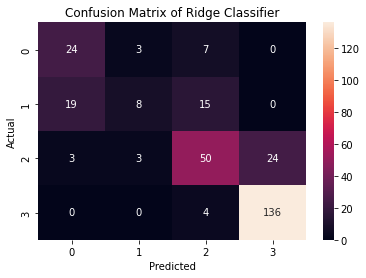

In [23]:
alphas = [0.001,0.01, 0.1, 0.5, 1, 5, 10]
# store_cv_values=True to store the cross validation values for each alpha
# MUST use leave-one-out cross validation for alpha selection
model = RidgeClassifierCV(alphas=alphas, store_cv_values=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)

print('Best alpha: ', model.alpha_)
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Ridge Classifier')
plt.show()

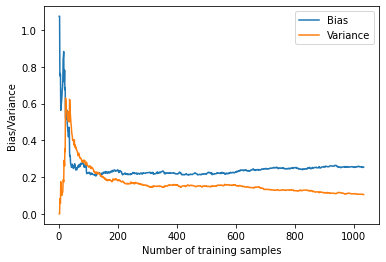

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

num_samples = np.arange(1, len(x_train)+1)
bias = []
variance = []

#q: what kinds of loss does bias_variance_decomp support?
#a: 
for n in num_samples:
    ridge = RidgeClassifier(**grid_search.best_params_)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        ridge, x_train.values[:n], y_train_encoded[:n], x_val.values, y_val_encoded,
        loss='mse',
        random_seed=123)
    bias.append(avg_bias)
    variance.append(avg_var)

plt.plot(num_samples, bias, label='Bias')
plt.plot(num_samples, variance, label='Variance')
plt.legend()
plt.xlabel('Number of training samples')
plt.ylabel('Bias/Variance')
plt.show()

### I will attempt to plot the accuracy of the model as a function of the regularization parameter alpha using two methods:
1. Manually looping through a range of alpha values and plotting the accuracy
2. Using the RidgeClassifierCV function to automatically find the best alpha value and plotting the accuracy while using leave-one-out cross validation

{0.001: 0.7398648648648649, 0.01: 0.7398648648648649, 0.1: 0.7398648648648649, 0.5: 0.7364864864864865, 1: 0.7331081081081081, 10: 0.7094594594594594}


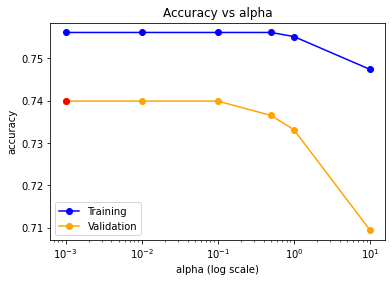

In [11]:
# Create a list of alpha values
# alphas = np.logspace(-4, 4, 10)
alphas = [0.001,0.01,0.1, 0.5, 1,10]

# Train a ridge classifier for each alpha value
models = []
for alpha in alphas:
    model = RidgeClassifier(alpha=alpha, solver = grid_search.best_params_['solver'])
    model.fit(x_train, y_train)
    models.append(model)

# Get the mean accuracy for each alpha value
training_accuracies = []
validation_accuracies = []
for model in models:
    training_accuracies.append(model.score(x_train, y_train))
    y_pred = model.predict(x_val)
    validation_accuracies.append(model.score(x_val, y_val))

best_aplha = alphas[np.argmax(validation_accuracies)]

# print a dictionary of alpha values and their mean accuracies
print(dict(zip(alphas, validation_accuracies)))

# make the x axis log scale
plt.plot(alphas, training_accuracies, 'o-', color='b', label='Training')
plt.plot(alphas, validation_accuracies, 'o-', color='orange', label='Validation')
plt.plot(best_aplha, validation_accuracies[np.argmax(validation_accuracies)], 'ro')
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('accuracy')
plt.title('Accuracy vs alpha')
plt.legend()
plt.show()

In [12]:
# Assume X_train, y_train, X_test, and y_test are defined
n_bootstraps = 100
n_train = x_train.shape[0]
n_test = x_val.shape[0]
validation_accuracies = np.zeros(n_bootstraps)

for i in range(n_bootstraps):
    # Bootstrap resample the training data
    X_sample, y_sample = resample(x_train, y_train)
    
    # Train a RidgeClassifier model on the resampled data
    model = RidgeClassifier(**grid_search.best_params_)
    model.fit(X_sample, y_sample)
    
    # Make predictions on the test set
    validation_accuracies[i] = model.score(x_val, y_val)

# Calculate the bias and variance estimates
bias = np.mean((np.mean(validation_accuracies) - 1) ** 2)
variance = np.mean(np.var(validation_accuracies))
error = bias + variance

print(f"Bias: {bias}")
print(f"Variance: {variance}")
print(f"Total Error: {error}")

Bias: 0.0714659069119796
Variance: 0.0003532813641344046
Total Error: 0.071819188276114


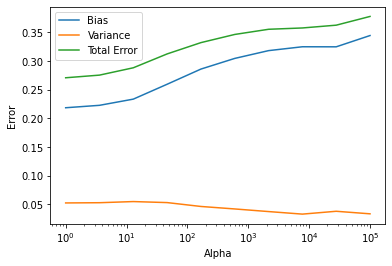

In [13]:
n_bootstraps = 100
n_train = x_train.shape[0]
n_test = x_val.shape[0]
alphas = np.logspace(0, 5, 10)
n_alphas = len(alphas)
bias = np.zeros(n_alphas)
variance = np.zeros(n_alphas)

for i, alpha in enumerate(alphas):
    validation_accuracies = np.zeros((n_test, n_bootstraps))
    
    for j in range(n_bootstraps):
        # Bootstrap resample the training data
        X_sample, y_sample = resample(x_train, y_train)
        
        # Train a RidgeClassifier model on the resampled data
        model = RidgeClassifier(alpha=alpha, solver = grid_search.best_params_['solver'])
        model.fit(X_sample, y_sample)
        
        # Calculate the accuracy on the test set
        validation_accuracies[:, j] = model.predict(x_val) == y_val
    
    # Calculate the bias and variance estimates
    bias[i] = np.mean((np.mean(validation_accuracies, axis=1) - 1) ** 2)
    variance[i] = np.mean(np.var(validation_accuracies, axis=1))

# Plot the bias-variance tradeoff
plt.plot(alphas, bias, label="Bias")
plt.plot(alphas, variance, label="Variance")
plt.plot(alphas, bias + variance, label="Total Error")
plt.legend()
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.show()

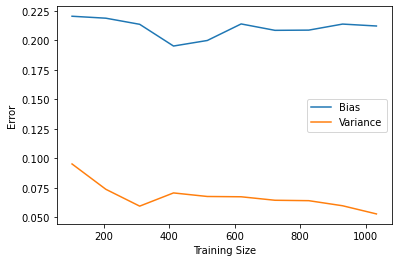

In [15]:
n_bootstraps = 100
n_train = x_train.shape[0]
n_test = x_val.shape[0]
train_sizes = np.linspace(0.1, 1.0, 10)
n_sizes = len(train_sizes)
bias = np.zeros(n_sizes)
variance = np.zeros(n_sizes)

for i, train_size in enumerate(train_sizes):
    # Get the current number of training examples
    n_train_curr = int(train_size * n_train)
    
    # Get the current training data
    x_train_curr = x_train[:n_train_curr]
    y_train_curr = y_train[:n_train_curr]
    
    validation_accuracies = np.zeros((n_test, n_bootstraps))
    
    for j in range(n_bootstraps):
        # Bootstrap resample the current training data
        X_sample, y_sample = resample(x_train_curr, y_train_curr)
        
        # Train a RidgeClassifier model on the resampled data
        model = RidgeClassifier(**grid_search.best_params_)
        model.fit(X_sample, y_sample)
        
        # Calculate the accuracy on the test set
        validation_accuracies[:, j] = model.predict(x_val) == y_val
    
    # Calculate the bias and variance estimates
    bias[i] = np.mean((np.mean(validation_accuracies, axis=1) - 1) ** 2)
    variance[i] = np.mean(np.var(validation_accuracies, axis=1))

# Plot the bias-variance tradeoff
plt.plot(train_sizes * n_train, bias, label="Bias")
plt.plot(train_sizes * n_train, variance, label="Variance")
plt.legend()
plt.xlabel("Training Size")
plt.ylabel("Error")
plt.show()

In [ ]:
# Create the Ridge classifier
clf = RidgeClassifier(**grid_search.best_params_)

# Calculate the bias and variance estimates
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    clf, x_train.values, y_train.values, x_val.values, y_val.values,
    loss='0-1_loss', random_seed=0)

# Print the bias and variance estimates
print(f"Bias: {avg_bias:.2f}")
print(f"Variance: {avg_var:.2f}")